In [ ]:
# This program utilizes the Long Short Term Memory (LSTM) method to
# predict the stock chart for a particular corporation.

In [37]:
# libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Get Stock Quote
stock_ticker = 'AAPL'
df = web.DataReader(stock_ticker, data_source='yahoo', start='2012-01-01', end='2021-09-20')
# Display Data
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.707487
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.218348
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.445396
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.794075
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.494045
...,...,...,...,...,...,...
2021-09-13,298.540009,294.079987,297.549988,296.989990,23652900.0,296.989990
2021-09-14,301.390015,298.100006,299.559998,299.790009,21853400.0,299.790009
2021-09-15,305.320007,301.820007,303.260010,304.820007,28356300.0,304.820007


In [9]:
# Get the number of rows and columns in the data set
df.shape

(2444, 6)

C:\Users\kawal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


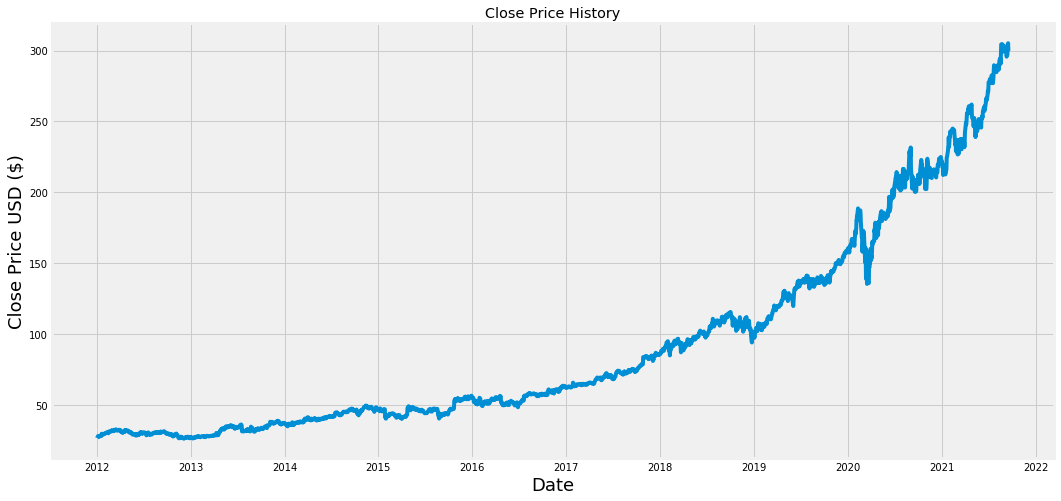

In [10]:
# Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1956

In [12]:
# Scale the data - apply preprocessing/scaling normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00143446],
       [0.00369374],
       [0.00469786],
       ...,
       [0.99856556],
       [1.        ],
       [0.98081404]])

In [16]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00143446, 0.00369374, 0.00469786, 0.00623991, 0.00491303,
       0.00527165, 0.00484131, 0.00584543, 0.00674197, 0.00677784,
       0.00667025, 0.00627578, 0.01197776, 0.01204948, 0.01065089,
       0.01143984, 0.01122467, 0.01025641, 0.01161915, 0.01133226,
       0.01262327, 0.01283844, 0.01387843, 0.01373498, 0.0142729 ,
       0.01538461, 0.01577909, 0.01481083, 0.01509772, 0.01391429,
       0.01319705, 0.01764389, 0.01750045, 0.01818182, 0.01757217,
       0.01793079, 0.01832526, 0.01785906, 0.01972387, 0.01925766,
       0.02123005, 0.02047696, 0.01947283, 0.01861215, 0.01961628,
       0.02022592, 0.0201542 , 0.02033351, 0.02259278, 0.02295141,
       0.02323829, 0.02234175, 0.0209073 , 0.0201542 , 0.01986731,
       0.02019006, 0.02022592, 0.0223059 , 0.02205487, 0.02087143])]
[0.02062039836752845]



In [17]:
# Convert the x_train and y_train to numpy arrays, so that we can train the LSTM model

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
# Reshape the data, so that we can change the shape from 2 dimensions to 3

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1896, 60, 1)

In [20]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1896/1896 [==============================] - 106s 56ms/step - loss: 2.1637e-04


In [26]:
# Create the testing data set 
# Create a new array containing scaled values from index 1896 to 2444

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [27]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [28]:
# Reshape the data from 2 dimensions to 3
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

4.492403937167809

C:\Users\kawal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


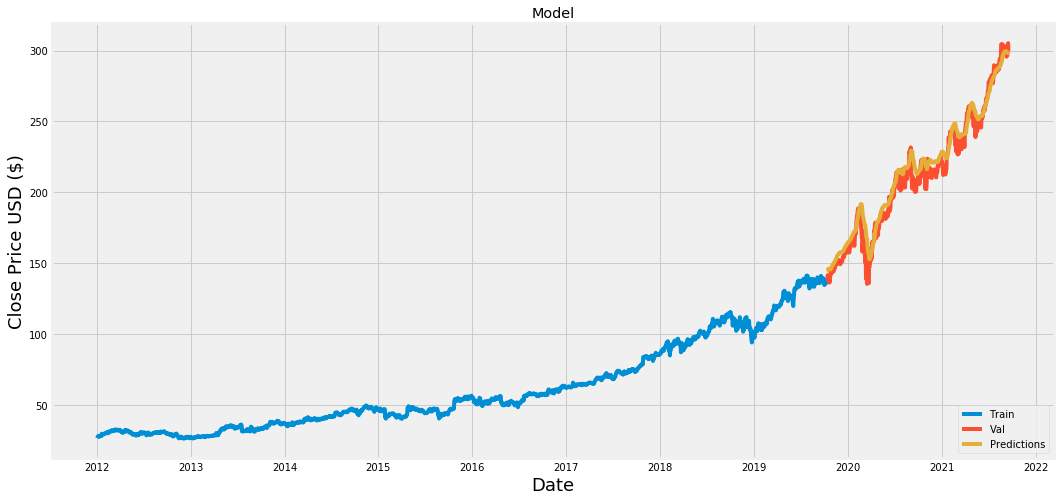

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-11,139.679993,144.558411
2019-10-14,139.550003,144.816238
2019-10-15,141.570007,145.100037
2019-10-16,140.410004,145.548706
2019-10-17,139.690002,145.937302
...,...,...
2021-09-13,296.989990,298.814392
2021-09-14,299.790009,298.404297
2021-09-15,304.820007,298.267792


In [35]:
# Get the quote
stock_quote = web.DataReader(stock_ticker, data_source='yahoo', start='2012-01-01', end='2021-09-20')
# Create a new dataframe
new_df = stock_quote.filter(['Close'])
# Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[299.0708]]


In [36]:
stock_quote2 = web.DataReader(stock_ticker, data_source='yahoo', start='2021-09-20', end='2021-09-20')
print(stock_quote2['Close'])

Date
2021-09-20    294.299988
Name: Close, dtype: float64
